## Importing the dependecies

In [1]:
# ! pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [2]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Sumit\anaconda3\envs\tf1.5\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


## MarketWatch GME data

In [3]:
df = pd.read_csv('data/DLF.NS.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


# Coverting date to datetimeformat

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [6]:
# df['Open'] = df['Open'].apply(lambda x: float(x.replace(",","")))

In [7]:
# df['High'] = df['High'].apply(lambda x: float(x.replace(",","")))

In [8]:
# df['Low'] = df['Low'].apply(lambda x: float(x.replace(",","")))

In [9]:
# df['Close'] = df['Close'].apply(lambda x: float(x.replace(",","")))

In [10]:
#Sorting the data from oldest to newest
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-18,149.449997,150.199997,146.000000,147.699997,146.941101,6470537.0
1,2020-06-19,148.500000,162.449997,148.500000,161.800003,160.968658,22605348.0
2,2020-06-22,164.500000,164.500000,158.300003,159.949997,159.128159,12877794.0
3,2020-06-23,162.000000,170.250000,159.500000,168.649994,167.783447,16145089.0
4,2020-06-24,168.649994,171.250000,158.850006,160.050003,159.227646,13866192.0


In [11]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-18,149.449997,150.199997,146.000000,147.699997,146.941101,6470537.0
2020-06-19,148.500000,162.449997,148.500000,161.800003,160.968658,22605348.0
2020-06-22,164.500000,164.500000,158.300003,159.949997,159.128159,12877794.0
2020-06-23,162.000000,170.250000,159.500000,168.649994,167.783447,16145089.0
2020-06-24,168.649994,171.250000,158.850006,160.050003,159.227646,13866192.0


In [12]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [13]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [147.699997 161.800003 159.949997 168.649994 160.050003 157.25
 154.399994 151.5      148.050003 150.25     152.850006 151.25
 154.850006 153.050003 146.399994 146.       147.75     142.899994
 139.899994 137.100006 138.550003 140.75     140.949997 143.300003
 142.699997 142.75     138.899994 136.199997 141.149994 139.850006
 140.100006 141.149994 138.5      142.600006 142.550003 142.649994
 141.850006 148.649994 146.550003 146.550003 147.75     142.449997
 147.149994 157.149994 157.550003 160.899994 161.699997 157.699997
 156.399994 160.       175.899994 173.050003 158.350006 160.899994
 161.100006 158.649994 154.850006 152.149994 150.25     150.100006
 150.199997 154.300003 155.699997 155.550003 163.350006 156.850006
 161.25     151.899994 148.949997 150.449997 146.25     151.350006
 157.699997 154.850006 152.649994 155.899994 159.25     162.899994
 158.699997 159.800003 157.       155.850006 155.100006 159.100006
 155.449997 162.550003 164.699997 167.449997 172.100006 1

## Build Environment

 n_state
[[297.850006  -6.600006]
 [313.649994  15.799988]
 [310.049988  -3.600006]
 [299.200012 -10.849976]
 [308.799988   9.599976]]
 reward
nan
  done
True
  info
{'total_reward': nan, 'total_profit': nan, 'position': 0}
 


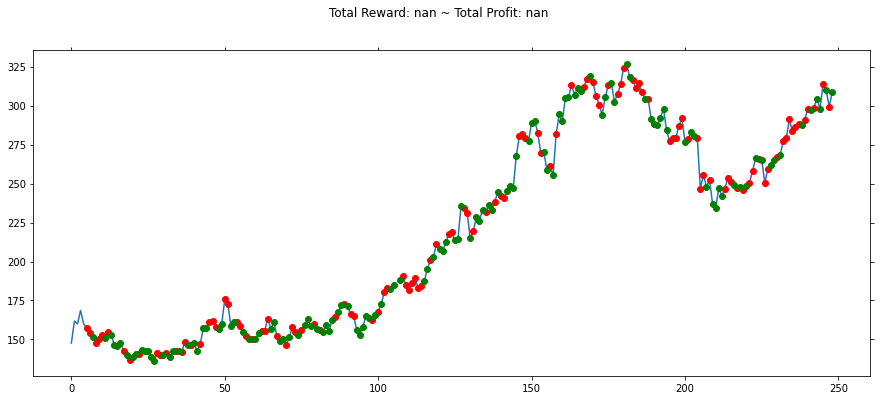

In [14]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [15]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

# 3.1 - Add Custom Indicators

### 3.1.1 Install and Import New Dependencies

##### `We'll  be using finta`

In [16]:
# !pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA #Technical Analysis lirary


### 3.1.2 - Fix Volume Column

In [17]:
# print(df.dtypes)
# #inintially volume is object/string changing it to float
# df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

# # (x.replace",","") stripping/removing all the commas


### 3.1.3 Calculate SMA,RSI and OBV

In [18]:
df['SMA'] = TA.SMA(df,12) #we want 12 period simple movimg average
df['RSI'] = TA.RSI(df) #relative strength index
df['OBV'] = TA.OBV(df) #on balance volume inndicator

df.fillna(0,inplace=True) #removing NAN with 0

In [19]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,149.449997,150.199997,146.000000,147.699997,146.941101,6470537.0,0.000000,0.000000,0.0
2020-06-19,148.500000,162.449997,148.500000,161.800003,160.968658,22605348.0,0.000000,100.000000,22605348.0
2020-06-22,164.500000,164.500000,158.300003,159.949997,159.128159,12877794.0,0.000000,87.619472,9727554.0
2020-06-23,162.000000,170.250000,159.500000,168.649994,167.783447,16145089.0,0.000000,92.390594,25872643.0
2020-06-24,168.649994,171.250000,158.850006,160.050003,159.227646,13866192.0,0.000000,65.513788,12006451.0
2020-06-25,159.800003,161.399994,156.550003,157.250000,156.442032,10615788.0,0.000000,59.449963,1390663.0
2020-06-26,159.149994,159.149994,152.350006,154.399994,153.606674,10524896.0,0.000000,53.973885,-9134233.0
2020-06-29,154.199997,155.300003,149.699997,151.500000,150.721573,5369270.0,0.000000,49.025370,-14503503.0
2020-06-30,153.000000,154.399994,147.199997,148.050003,147.289307,6991814.0,0.000000,43.872067,-21495317.0


#### 3.1.4 Create New Environment

In [20]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size #here env.frame_bound[0] = 5
    end = env.frame_bound[1] # here env.frame_bound[1] = 250
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end] 
    return prices,signal_features

In [21]:
#Creating custom env
class MyCustomEnv(StocksEnv): #inheritence is happening here
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50)) #creating instance

In [22]:
env2.prices

array([146.      , 148.5     , 158.300003, 159.5     , 158.850006,
       156.550003, 152.350006, 149.699997, 147.199997, 147.899994,
       150.      , 149.5     , 152.25    , 150.      , 145.600006,
       144.600006, 144.649994, 141.649994, 139.300003, 136.5     ,
       134.5     , 137.300003, 139.600006, 141.699997, 141.199997,
       141.5     , 136.899994, 134.5     , 135.199997, 138.300003,
       137.800003, 139.      , 138.      , 138.300003, 141.      ,
       141.      , 141.      , 142.399994, 145.800003, 144.550003,
       145.699997, 140.350006, 141.699997, 146.600006, 155.600006,
       155.      , 160.5     , 157.      , 154.699997, 156.100006])

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,149.449997,150.199997,146.000000,147.699997,146.941101,6470537.0,0.0,0.000000,0.0
2020-06-19,148.500000,162.449997,148.500000,161.800003,160.968658,22605348.0,0.0,100.000000,22605348.0
2020-06-22,164.500000,164.500000,158.300003,159.949997,159.128159,12877794.0,0.0,87.619472,9727554.0
2020-06-23,162.000000,170.250000,159.500000,168.649994,167.783447,16145089.0,0.0,92.390594,25872643.0
2020-06-24,168.649994,171.250000,158.850006,160.050003,159.227646,13866192.0,0.0,65.513788,12006451.0


In [24]:
env2.signal_features

array([[ 1.46000000e+02,  6.47053700e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.48500000e+02,  2.26053480e+07,  0.00000000e+00,
         1.00000000e+02,  2.26053480e+07],
       [ 1.58300003e+02,  1.28777940e+07,  0.00000000e+00,
         8.76194723e+01,  9.72755400e+06],
       [ 1.59500000e+02,  1.61450890e+07,  0.00000000e+00,
         9.23905945e+01,  2.58726430e+07],
       [ 1.58850006e+02,  1.38661920e+07,  0.00000000e+00,
         6.55137878e+01,  1.20064510e+07],
       [ 1.56550003e+02,  1.06157880e+07,  0.00000000e+00,
         5.94499626e+01,  1.39066300e+06],
       [ 1.52350006e+02,  1.05248960e+07,  0.00000000e+00,
         5.39738849e+01, -9.13423300e+06],
       [ 1.49699997e+02,  5.36927000e+06,  0.00000000e+00,
         4.90253697e+01, -1.45035030e+07],
       [ 1.47199997e+02,  6.99181400e+06,  0.00000000e+00,
         4.38720673e+01, -2.14953170e+07],
       [ 1.47899994e+02,  7.32569000e+06,  0.00000000e+00,
         4.76509354e+01

## Building Environment and Training

In [25]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:env2
# env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)

env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [ ]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.098    |
| fps                | 4        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 12.4     |
---------------------------------
---------------------------------
| explained_variance | -0.0138  |
| fps                | 168      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 3.89     |
---------------------------------
---------------------------------
| explained_variance | -0.0559  |
| fps                | 208     

## Testing the model

In [ ]:
# env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
env = MyCustomEnv(df=df,window_size=12,frame_bound=(180,240))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

# Visualising our model

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()

plt.savefig("DLF",dpi=100)
plt.show()

In [ ]:
! git add "DLFStocksTrader.ipynb"
! git commit -m "DLF stocks"
! git push origin main